# Сессия 4 

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.model_selection import RandomizedSearchCV

Чтение csv файла с данными 

In [30]:
df_nan_m = pd.read_csv("clear_data_median_fill.csv", index_col=0)

Чтение файла с таргетами

In [31]:
tars = pd.read_csv("Outcomes.txt", sep=",")

In [32]:
tars.columns = ['ID', 'SAPS-I', 'SOFA', 'Length_of_stay', 'Survival',
       'In-hospital_death']

Объединение двух файлов по ID

In [33]:
df_nan_m = pd.merge(df_nan_m,tars,on="ID")

ID можно убрать тк это никак не влияет на состояние пациента

In [34]:
df = df_nan_m.drop(['ID'], axis=1)

Заменим все значения -1(`NaN`) на среднее значение по столбцу

In [35]:
for i in df.columns:
    df[i] = df[i].replace(-1, df[i].median())

In [36]:
df

,Temp_first_val,Temp_last_val,Temp_min,Temp_max,Temp_mean,FiO2_mean,Urine_first_val,Urine_last_val,Urine_min,Urine_max,...,Gender,Height,Age,Weight,ICUType,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,35.1,37.8,35.1,38.2,37.357143,0.526667,900.0,280.0,0.0,900.0,...,0.0,152.4,54.0,76.50,4.0,6,1,5,-1,0
1,35.2,37.1,34.5,37.9,36.939130,0.560000,770.0,220.0,0.0,770.0,...,1.0,175.3,76.0,76.00,2.0,16,8,8,-1,0
2,37.8,37.2,36.7,39.0,37.800000,0.500000,100.0,35.0,18.0,425.0,...,0.0,152.4,44.0,56.70,3.0,21,11,19,-1,0
3,36.3,37.0,35.1,37.0,36.223077,0.526667,600.0,550.0,100.0,700.0,...,1.0,180.3,68.0,84.60,3.0,7,1,9,575,0
4,37.8,36.7,35.8,37.8,36.880000,0.526667,140.0,80.0,16.0,220.0,...,0.0,152.4,88.0,76.50,3.0,17,2,4,918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7598,36.8,36.3,36.1,37.4,36.854348,0.686364,120.0,80.0,0.0,800.0,...,1.0,180.3,78.0,83.18,2.0,21,13,6,752,0
7599,37.2,36.6,36.3,37.7,37.092857,0.526667,0.0,35.0,0.0,70.0,...,1.0,177.8,90.0,87.00,3.0,28,14,10,39,0
7600,37.3,36.2,36.0,37.3,36.600000,0.526667,8.0,565.0,4.0,565.0,...,0.0,152.4,70.0,74.00,2.0,12,4,19,334,0
7601,36.1,36.1,36.1,37.1,36.409091,0.526667,400.0,65.0,65.0,600.0,...,0.0,152.4,49.0,57.00,3.0,5,0,12,-1,0


Разделим на признаки и целевую

In [37]:
X = df.drop(["In-hospital_death"], axis=1)
y = df["In-hospital_death"]

#### Feature_importance
Отбор важных признаков 

In [41]:
clf = RandomForestClassifier(random_state = 42)
clf.fit(X, y)
importances = clf.feature_importances_
important_names = X.columns[importances > np.median(importances)]
print(important_names)

Index(['Temp_first_val', 'Temp_last_val', 'Temp_min', 'Temp_max', 'Temp_mean',
       'FiO2_mean', 'Urine_last_val', 'Urine_max', 'Urine_mean',
       'Urine_median', 'NIDiasABP_last_val', 'WBC_last_val', 'WBC_min',
       'WBC_max', 'WBC_mean', 'HCO3_last_val', 'HCO3_min', 'HCO3_mean',
       'SysABP_mean', 'Glucose_last_val', 'Glucose_median',
       'NISysABP_last_val', 'NISysABP_max', 'NISysABP_mean', 'Creatinine_mean',
       'GCS_last_val', 'GCS_max', 'GCS_mean', 'PaO2_mean', 'pH_mean',
       'PaCO2_mean', 'Na_last_val', 'Na_mean', 'NIMAP_last_val',
       'HR_first_val', 'HR_last_val', 'HR_min', 'HR_max', 'HR_mean',
       'HR_median', 'BUN_first_val', 'BUN_last_val', 'BUN_min', 'BUN_max',
       'BUN_mean', 'Platelets_first_val', 'Platelets_min', 'Platelets_mean',
       'Age', 'Weight', 'SAPS-I', 'SOFA', 'Length_of_stay', 'Survival'],
      dtype='object')


In [42]:
X = X[important_names]

Разделение на `train, test, valid`. Тренировочная выборка будет самой большой: 60%, валидационная и тестовая будут одинаковыми по 20%

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

Создание трех моделей классификации: логистическа регрессия, классификатор методом ближайших соседей, и случайный лес

In [39]:
models = [LogisticRegression(),
          KNeighborsClassifier(n_neighbors=5), 
          RandomForestClassifier(random_state=42), 
          ]

LogisticRegression()
accuracy_score 0.8856015779092702
KNeighborsClassifier()
accuracy_score 0.8632478632478633
RandomForestClassifier(random_state=42)
accuracy_score 0.9585798816568047


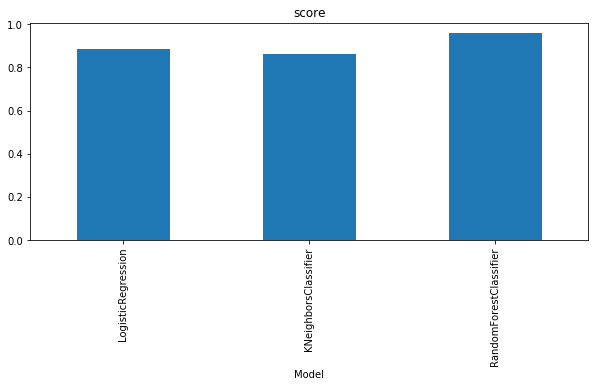

In [45]:
TestModels = pd.DataFrame()
temp = {}
for model in models:
    m = str(model)
    print(m)
    temp['Model'] = m[:m.index('(')]
    
    clf = model
    clf.fit(X_train, y_train)
    
    pred = clf.predict(X_val)
    
    temp['accuracy_score'] = accuracy_score(pred, y_val)
    print('accuracy_score', accuracy_score(pred, y_val))
    TestModels = TestModels.append([temp])
TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.accuracy_score.plot(ax=axes, kind='bar', title='score')
plt.show()

Лучше всего себя показал: `RandomForestClassifier`

Оценим точность на тестовых данных методом `f1_score`

In [47]:
print(f1_score(models[2].predict(X_test), y_test))

0.887218045112782


И далее произведем подбор гиперпараметров для случайного леса

In [49]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
rfc = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=42)

#### Лучшие параметры для модели получились <br>
`{'n_estimators': 500,
 'min_samples_split': 44,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': True}`

In [51]:
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


{'n_estimators': 500,
 'min_samples_split': 44,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': True}

Таблица со значениями параметров и их результат

In [52]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)


,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,500,44,12,sqrt,6,True,0.907915,1
1,400,23,18,log2,13,False,0.904187,2
2,300,12,23,log2,14,False,0.898487,3
3,600,50,39,sqrt,8,True,0.896733,4
4,300,18,39,log2,8,False,0.885113,5
5,700,44,44,log2,13,False,0.883578,6
6,900,28,7,log2,5,False,0.883140,7
7,100,28,44,log2,9,True,0.874588,8
8,600,34,12,log2,4,True,0.865162,9
9,100,34,44,log2,1,True,0.853541,10


Создадим новую модель с подобраннами параметрами, обучим ее и оценим точность 

In [53]:
{'n_estimators': 500,
 'min_samples_split': 44,
 'min_samples_leaf': 12,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': True}

rfc = RandomForestClassifier(n_estimators= 500,
 min_samples_split= 44,
 min_samples_leaf = 12,
 max_features = 'sqrt',
 max_depth = 6,
 bootstrap = True)


In [54]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=12,
                       min_samples_split=44, n_estimators=500)

In [56]:
print(f1_score(rfc.predict(X_test), y_test))

0.5980066445182723
